### Geo data analysis on twitter data from archive.com

In [1]:
import pandas as pd
import folium
import pycountry
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

### Get the data

In [2]:
geo_data = pd.read_csv("./geo_data/geo_data.csv", delimiter="\t")

In [3]:
geo_data.shape

(1597269, 12)

### Distrbution of data before inffering the location field
## Total Number of tweets : 6997167

In [47]:
total_tweets = 6997167
#146796733
#146526204
tweets_with_geo = total_tweets - 6984516
tweets_with_place = total_tweets - 6896113
tweets_with_location = 4450952
inferred_tweets = 1597269

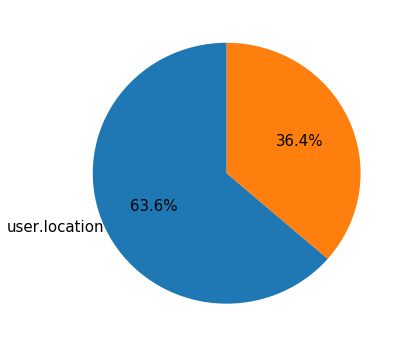

Number of tweets having user.location: 4450952


In [48]:
mpl.rcParams['font.size'] = 15.0
labels = ["user.location", ""]
sizes = [tweets_with_location, total_tweets - tweets_with_location]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(6,6)
plt.show()
print "Number of tweets having user.location: {}".format(tweets_with_location)

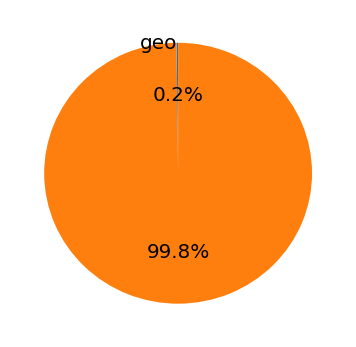

Number of tweets having geo: 12651


In [44]:
mpl.rcParams['font.size'] = 20.0
labels = ["geo", ""]
sizes = [tweets_with_geo, total_tweets - tweets_with_geo]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(6,6)
plt.show()
print "Number of tweets having geo: {}".format(tweets_with_geo)

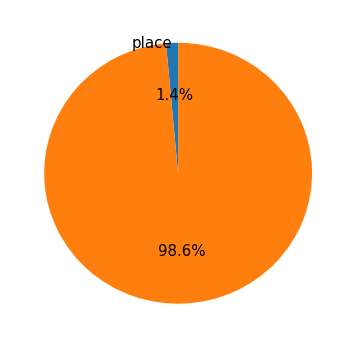

Number of tweets having place: 101054


In [45]:
mpl.rcParams['font.size'] = 15.0
labels = ["place", ""]
sizes = [tweets_with_place, total_tweets - tweets_with_place]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(6,6)
plt.show()
print "Number of tweets having place: {}".format(tweets_with_place)

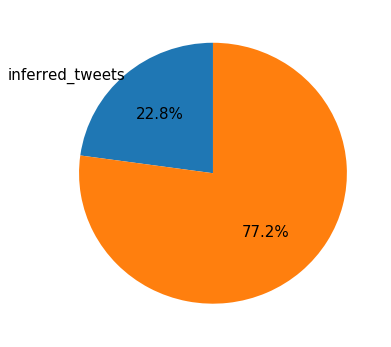

Number of inferred_tweets: 1597269


In [46]:
mpl.rcParams['font.size'] = 15.0
labels = ["inferred_tweets", ""]
sizes = [inferred_tweets, total_tweets - inferred_tweets]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(6,6)
plt.show()
print "Number of inferred_tweets: {}".format(inferred_tweets)

## Distribution of resolution method

In [14]:
resolution_method_data = geo_data.groupby(['resolution_method']).size().reset_index(name='counts')

['geocode', 'place', 'profile']
[9627, 10139, 1577503]


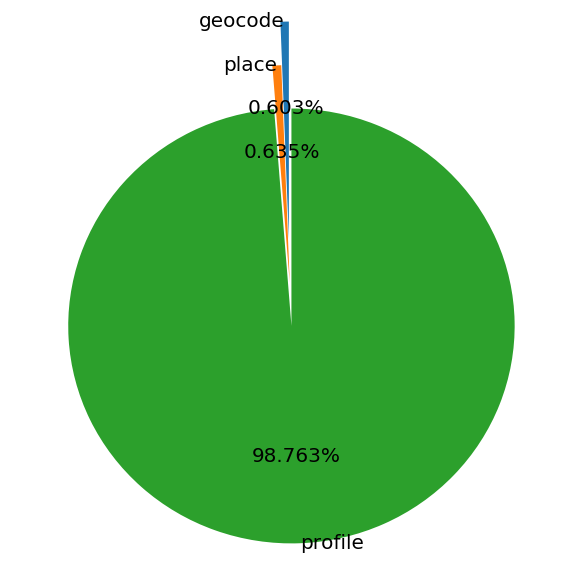

In [15]:
mpl.rcParams['font.size'] = 20.0
labels = list(resolution_method_data.resolution_method)
sizes = list(resolution_method_data.counts)
explode = (.2, 0, .2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.3f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(10,10)
print list(resolution_method_data.resolution_method)
print list(resolution_method_data.counts)
plt.show()

### Country/City/State data

In [16]:
total_count = geo_data.shape[0]
city_count = total_count - geo_data[geo_data.city.isnull()].shape[0]
state_count = total_count - geo_data[geo_data.state.isnull()].shape[0]
country_count = total_count - geo_data[geo_data.country.isnull()].shape[0]

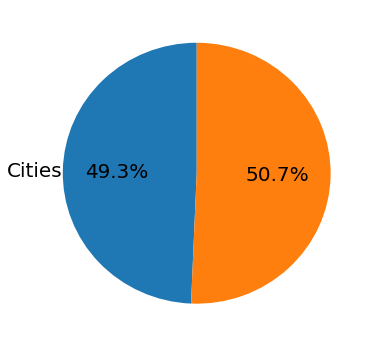

Number of tweets having cities: 787860 out of 1597269 tweets


In [17]:
mpl.rcParams['font.size'] = 20.0
labels = ["Cities", ""]
sizes = [city_count, total_count- city_count]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(6,6)
plt.show()
print "Number of tweets having cities: {} out of {} tweets".format(city_count, total_count)

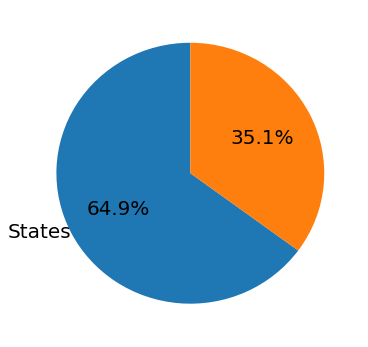

Number of tweets having states: 1036740 out of 1597269 tweets


In [18]:
mpl.rcParams['font.size'] = 20.0
labels = ["States", ""]
sizes = [state_count, total_count- state_count]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(6,6)
plt.show()
print "Number of tweets having states: {} out of {} tweets".format(state_count, total_count)

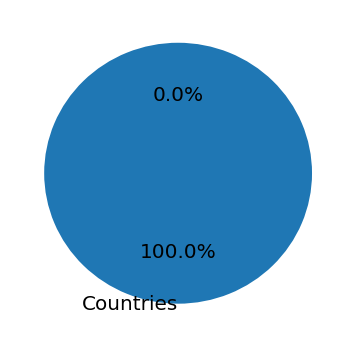

Number of tweets having countries: 1597268 out of 1597269 tweets


In [19]:
mpl.rcParams['font.size'] = 20.0
labels = ["Countries", ""]
sizes = [country_count, total_count- country_count]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(6,6)
plt.show()
print "Number of tweets having countries: {} out of {} tweets".format(country_count, total_count)

## Tweet distribution country wise 

In [20]:
country_data = geo_data.groupby(['country']).size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)
sLength = len(country_data['country'])
country_data['country_code'] = pd.Series(np.random.randn(sLength), index=country_data.index)

In [21]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3    
#codes = [countries.get(country, 'Unknown code') for country in input_countries]

In [22]:
for i, row in country_data.iterrows():
    try:
        country_data.ix[i, 'country_code'] = countries[row[0]]
    except Exception as e:
        print e

'Venezuela'
'South Korea'
'Russia'
'Taiwan'
'The Netherlands'
'Federated States of Micronesia'
'Iran'
'Tanzania'
'Vietnam'
'The Bahamas'
'Bolivia'
'Syria'
'Czech Republic'
'Brunei'
'Macedonia'
'Palestinian Territories'
'Ivory Coast'
'Macau-China'
'North Korea'
'Moldova'
'St. Lucia'
'Democratic Republic of Congo'
'British Virgin Islands'
'Republic of Lithuania'
'Netherlands Antilles'
'Republic of Latvia'
'Vatican City'
'Cape Verde'
'The Gambia'
'Reunion'


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
_country_data = country_data.drop(['country'], axis=1)

In [25]:
m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=os.path.join('./geo_data', 'world-countries.json'),
    name='choropleth',
    data=_country_data[_country_data.country_code!='USA'],
    columns=['country_code', 'counts'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Tweet distribution'
)
folium.LayerControl().add_to(m)
print "Heat map excluding the USA"
m

Heat map excluding the USA


In [26]:
top_elemnts = 15
top_countries = _country_data[:top_elemnts]
other_countries_counts = _country_data[top_elemnts:]["counts"].sum()

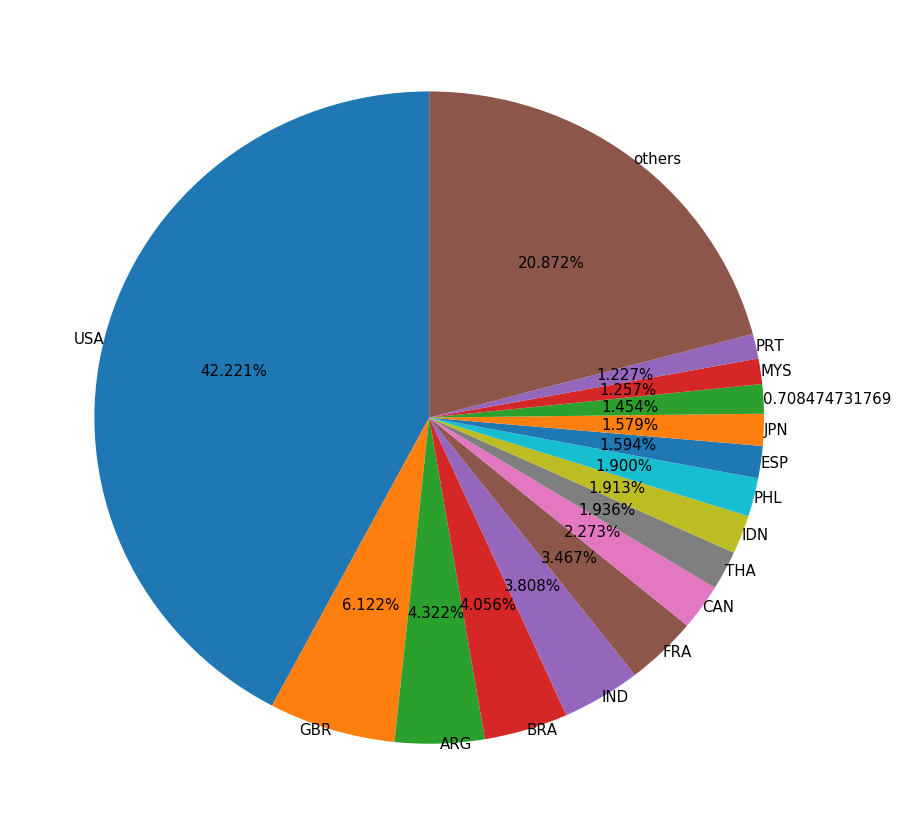

In [27]:
mpl.rcParams['font.size'] = 15.0
labels = list(top_countries.country_code)
labels.append("others")
sizes = list(top_countries.counts)
sizes.append(other_countries_counts)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%2.3f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(15,15)
plt.show()

## Tweet distribution state wise:

In [28]:
state_data = geo_data.groupby(['state']).size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)

In [29]:
top_elemnts = 15
top_states = state_data[:top_elemnts]
other_states_counts = state_data[top_elemnts:]["counts"].sum()

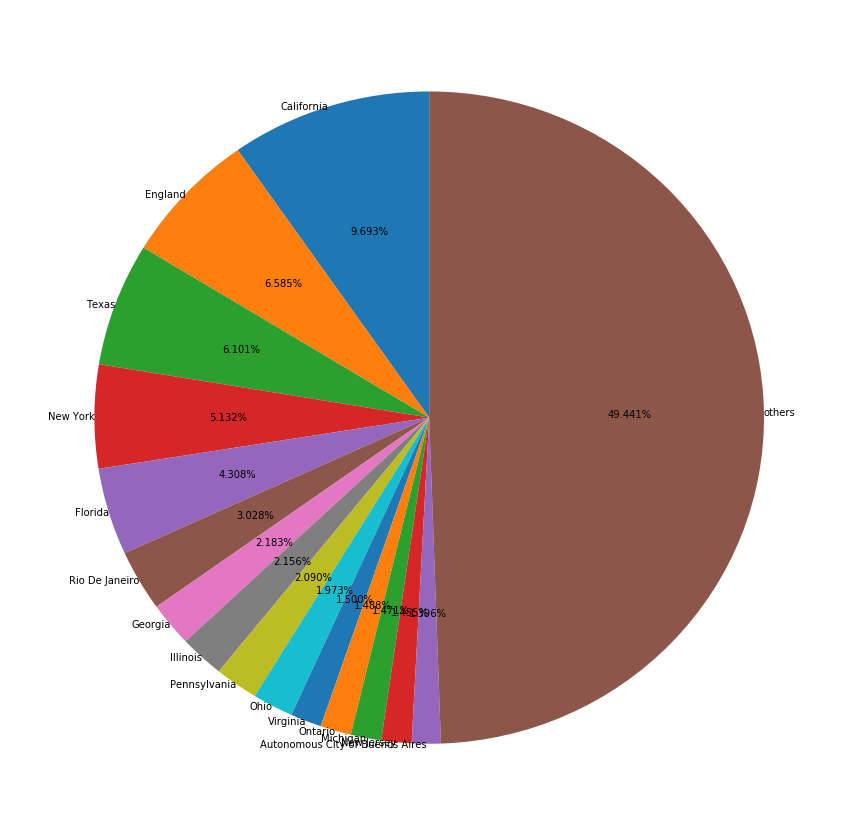

In [30]:
mpl.rcParams['font.size'] = 10.0
labels = list(top_states.state)
labels.append("others")
sizes = list(top_states.counts)
sizes.append(other_states_counts)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%2.3f%%',
        shadow=False, startangle=90, labeldistance=1)
#ax1.axis('unequal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(15,15)
plt.show()

In [31]:
city_data = geo_data.groupby(['city']).size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)

In [32]:
top_elemnts = 21
top_cities = city_data[:top_elemnts]
other_cities_counts = city_data[top_elemnts:]["counts"].sum()

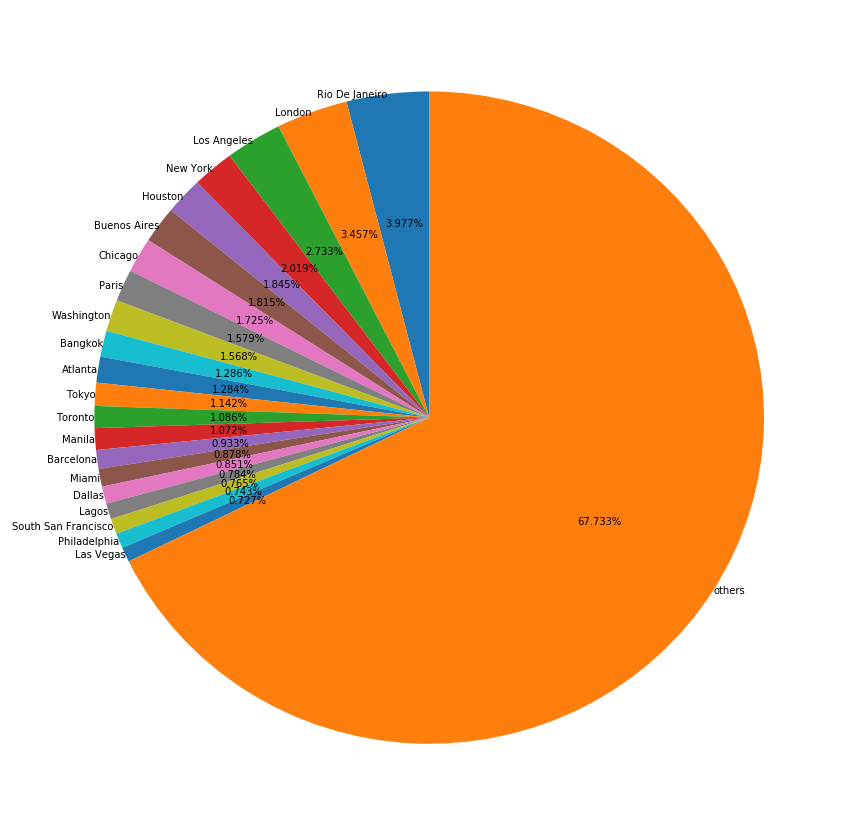

In [33]:
mpl.rcParams['font.size'] = 10.0
labels = list(top_cities.city)
labels.append("others")
sizes = list(top_cities.counts)
sizes.append(other_cities_counts)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%2.3f%%',
        shadow=False, startangle=90, labeldistance=1)
fig1 = plt.gcf()
fig1.set_size_inches(15,15)
plt.show()

## US states

In [34]:
us_data = geo_data[geo_data.country == "United States"].groupby(['state']).size().reset_index(name='counts').sort_values(by=['counts'],ascending=False)

In [35]:
top_elemnts = 29
top_us_states = us_data[:top_elemnts]
other_us_states_counts = us_data[top_elemnts:]["counts"].sum()

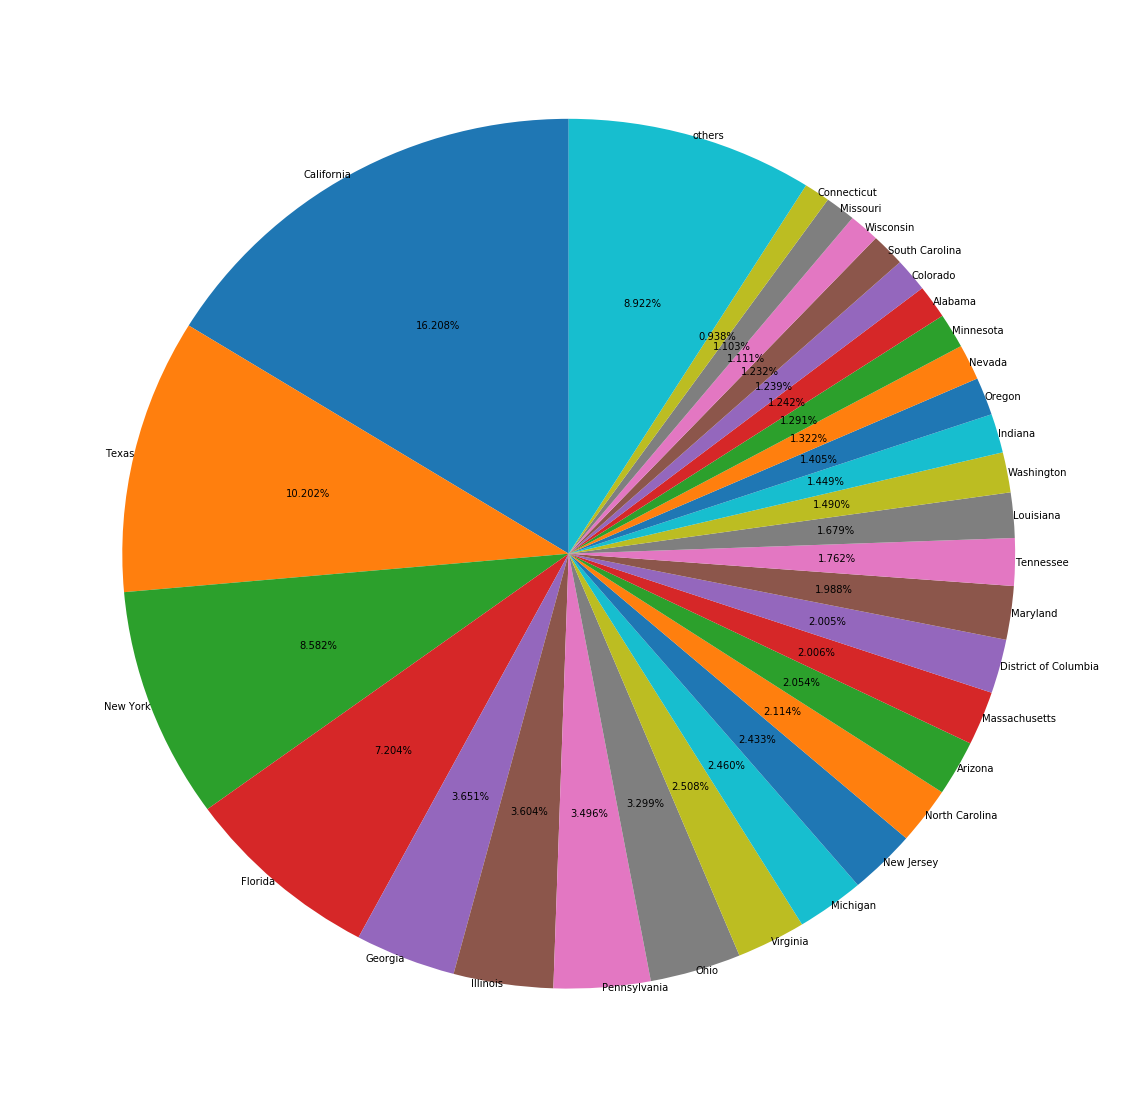

In [36]:
mpl.rcParams['font.size'] = 10.0
labels = list(top_us_states.state)
labels.append("others")
sizes = list(top_us_states.counts)
sizes.append(other_us_states_counts)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%2.3f%%',
        shadow=False, startangle=90, labeldistance=1)
fig1 = plt.gcf()
fig1.set_size_inches(20,20)
plt.show()

In [37]:
us_data.shape

(55, 2)